## Importing

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRFRegressor
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset


In [33]:
df = pd.read_csv(r"C:\Users\motaz\OneDrive\Desktop\Projects\Sales_prediction\Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### statistical info

In [34]:
df.shape

(8523, 12)

In [35]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Preprocessing the dataset


#### Checking num of unique values

In [55]:
df.nunique()

Item_Identifier            3
Item_Weight              416
Item_Fat_Content           2
Item_Visibility         7880
Item_Type                 16
Item_MRP                5938
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
Outlet_age                 9
dtype: int64

#### Checking num of missing values

In [56]:
df.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_age              0
dtype: int64

### handling missing values

In [39]:
imputer = SimpleImputer(strategy="mean")
df[['Item_Weight']] = imputer.fit_transform(df[['Item_Weight']])

In [40]:
df['Item_Weight'].isnull().sum()

0

In [41]:
imputer = SimpleImputer(strategy="most_frequent")
df[['Outlet_Size']] = imputer.fit_transform(df[['Outlet_Size']])

In [42]:
df['Outlet_Size'].isnull().sum()

0

In [43]:
sum(df['Item_Visibility']== 0)

526

In [44]:
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()] , inplace= True)

In [45]:
sum(df['Item_Visibility']== 0)

0

### Feature Engineering

#### Item fat content

In [46]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [47]:
df.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

#### Item_Type

In [48]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

#### Item_Identifier

In [49]:
df['Item_Identifier'] = df['Item_Identifier'].str[:2]	
df['Item_Identifier']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Identifier, Length: 8523, dtype: object

In [50]:
df['Item_Identifier'] = df['Item_Identifier'].replace({'DR' : 'Drink','FD':'Food','NC':'Non_Cons'})
df['Item_Identifier'].value_counts()

Item_Identifier
Food        6125
Non_Cons    1599
Drink        799
Name: count, dtype: int64

#### Outlet Establishment Year

In [51]:
df['Outlet_age'] = 2025 - df['Outlet_Establishment_Year']
df['Outlet_age'] 

0       26
1       16
2       26
3       27
4       38
        ..
8518    38
8519    23
8520    21
8521    16
8522    28
Name: Outlet_age, Length: 8523, dtype: int64

In [52]:
df = df.drop('Outlet_Establishment_Year',axis=1)

In [53]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,Food,9.30,LF,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,26
1,Drink,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,16
2,Food,17.50,LF,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,26
3,Food,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,27
4,Non_Cons,8.93,LF,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,38


## EDA

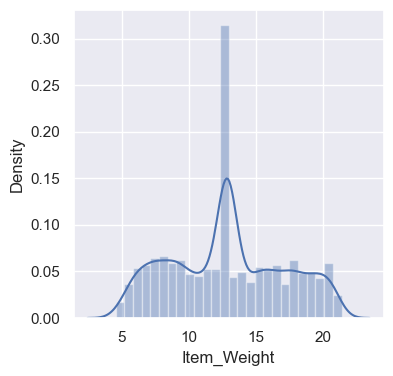

In [86]:
sns.distplot(df['Item_Weight']);

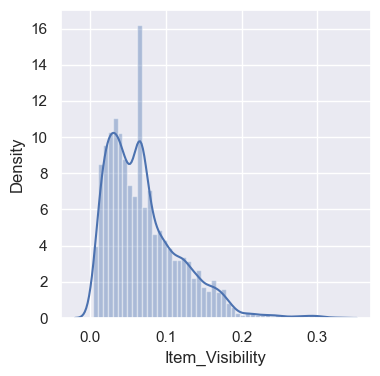

In [85]:
sns.set(rc={'figure.figsize': (4, 4)})
sns.distplot(df['Item_Visibility']);

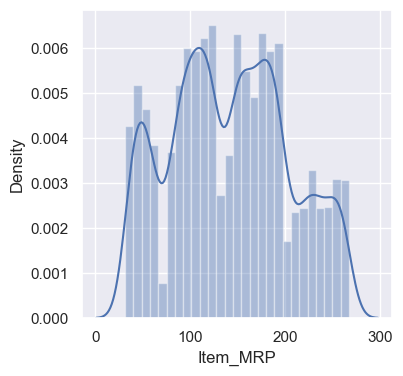

In [87]:
sns.distplot(df['Item_MRP']);

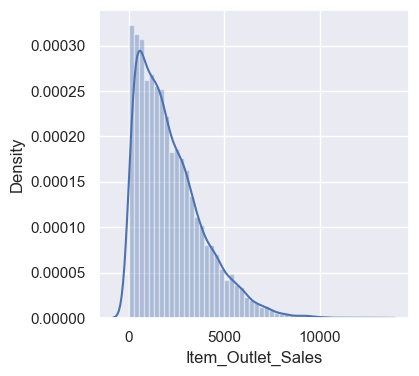

In [88]:
sns.distplot(df['Item_Outlet_Sales']);

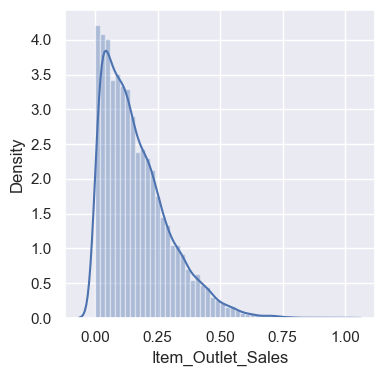

In [90]:
scaler = MinMaxScaler()
df['Item_Outlet_Sales'] = scaler.fit_transform(df[['Item_Outlet_Sales']])
sns.distplot(df['Item_Outlet_Sales']);

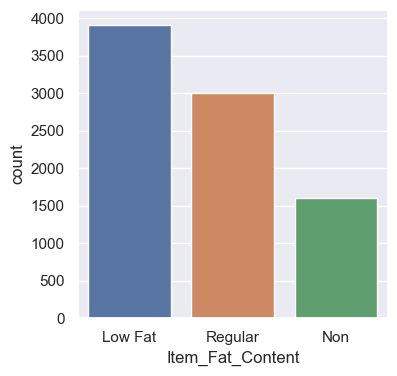

In [104]:
sns.countplot(x ='Item_Fat_Content' , data = df);

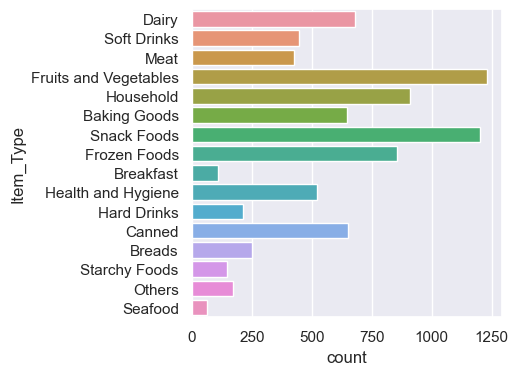

In [113]:
sns.countplot(y ='Item_Type' , data = df);

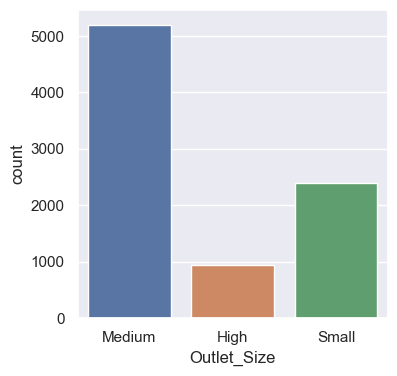

In [114]:
sns.countplot(x ='Outlet_Size' , data = df);

## Handling Categorical Columns


In [57]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    df[col]=oe.fit_transform(df[[col]])
    print(oe.categories_)

[array(['Drink', 'Food', 'Non_Cons'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [58]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,1.0,9.30,0.0,0.016047,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,26
1,0.0,5.92,1.0,0.019278,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,16
2,1.0,17.50,0.0,0.016760,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,26
3,1.0,19.20,1.0,0.066132,6.0,182.0950,0.0,1.0,2.0,0.0,732.3800,27
4,2.0,8.93,0.0,0.066132,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,38


In [59]:
X = df.drop('Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

### Random Forest Regressor


In [67]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5486840727087227


### XGBRFRegressor


In [68]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5953710809219505


### XGBRFRegressor Feature importances


In [69]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
9,Outlet_Type,0.470614
10,Outlet_age,0.187430
5,Item_MRP,0.170804
6,Outlet_Identifier,0.132830
7,Outlet_Size,0.014820
8,Outlet_Location_Type,0.013522
3,Item_Visibility,0.003719
4,Item_Type,0.002267
1,Item_Weight,0.001935
0,Item_Identifier,0.001087


In [71]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Item_Visibility','Item_Weight',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.596674266552023


In [73]:
final_data = X.drop(columns=['Item_Visibility','Item_Weight',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)

### Best Model

In [76]:
X_train,X_test,y_train,y_test = train_test_split(final_data,y,
                                                 test_size=0.20,
                                                 random_state=42)

In [77]:
xg_final = XGBRFRegressor()

In [78]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [79]:
y_pred = xg_final.predict(X_test)

In [81]:
mean_absolute_error(y_test,y_pred)

713.6269171614678

### Save Model 


In [93]:
with open('bigmart_model.pkl', 'wb') as f:
    pickle.dump(xg_final,f)

In [94]:
with open('bigmart_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [95]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2065.1816
